# Extração do Banco de Dados 

 BASE DE DADOS do DATALAKE => **Base dos Dados** 
    
 **Escopo:**
 
 - Base: Sistema de Informações sobre Mortalidade (SIM)
 - Criado por: DATASUS
 - Organização: MS
 - Cobertura Temporal: 1996-2020

In [5]:
import basedosdados as bd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Definindo tema
sns.set_theme(style='darkgrid')

In [6]:
dataset = 'br_ms_sim'
project = 'cellular-arbor-354201'

In [7]:
# Carregar base de dados 

df_dict = bd.read_table(dataset_id=dataset,
table_id='dicionario',
billing_project_id=project)

Downloading: 100%|██████████| 572/572 [00:00<00:00, 1719.21rows/s]


In [8]:
df_dict

,id_tabela,coluna,chave,cobertura_temporal,valor
0,microdados,tipo_obito,1,1996(1)2019,Fetal
1,microdados,tipo_obito,2,1996(1)2019,Não-fetal
2,microdados,naturalidade,1,1996(1)2019,ABU DABI
3,microdados,naturalidade,2,1996(1)2019,ACORES
4,microdados,naturalidade,3,1996(1)2019,AFEGANISTAO
...,...,...,...,...,...
567,municipio_causa_idade_sexo_raca,raca_cor,4,1996(1)2019,Parda
568,municipio_causa_idade_sexo_raca,raca_cor,5,1996(1)2019,Indígena
569,municipio_causa_idade_sexo_raca,raca_cor,6,1996(1)2019,None
570,municipio_causa_idade_sexo_raca,raca_cor,7,1996(1)2019,None


In [9]:
# Consultar colunas
df_dict.columns

Index(['id_tabela', 'coluna', 'chave', 'cobertura_temporal', 'valor'], dtype='object')

In [10]:
# Verificar se há valores ausentes
df_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_tabela           572 non-null    object
 1   coluna              572 non-null    object
 2   chave               572 non-null    object
 3   cobertura_temporal  572 non-null    object
 4   valor               453 non-null    object
dtypes: object(5)
memory usage: 22.5+ KB


In [11]:
# Verificar quantidade de valores ausentes
df_dict.isnull().sum()

id_tabela               0
coluna                  0
chave                   0
cobertura_temporal      0
valor                 119
dtype: int64

In [12]:
# Confirmar total de valores ausentes
df_dict.isnull().sum().sum()

119

In [13]:
# Descartar linhas se houver algum valor NaN
df_dict.dropna(axis = 0)

,id_tabela,coluna,chave,cobertura_temporal,valor
0,microdados,tipo_obito,1,1996(1)2019,Fetal
1,microdados,tipo_obito,2,1996(1)2019,Não-fetal
2,microdados,naturalidade,1,1996(1)2019,ABU DABI
3,microdados,naturalidade,2,1996(1)2019,ACORES
4,microdados,naturalidade,3,1996(1)2019,AFEGANISTAO
...,...,...,...,...,...
564,municipio_causa_idade_sexo_raca,raca_cor,1,1996(1)2019,Branca
565,municipio_causa_idade_sexo_raca,raca_cor,2,1996(1)2019,Preta
566,municipio_causa_idade_sexo_raca,raca_cor,3,1996(1)2019,Amarela
567,municipio_causa_idade_sexo_raca,raca_cor,4,1996(1)2019,Parda


In [14]:
# Descartar colunas se hover algum valor NaN
df_dict.dropna(axis = 1)

,id_tabela,coluna,chave,cobertura_temporal
0,microdados,tipo_obito,1,1996(1)2019
1,microdados,tipo_obito,2,1996(1)2019
2,microdados,naturalidade,1,1996(1)2019
3,microdados,naturalidade,2,1996(1)2019
4,microdados,naturalidade,3,1996(1)2019
...,...,...,...,...
567,municipio_causa_idade_sexo_raca,raca_cor,4,1996(1)2019
568,municipio_causa_idade_sexo_raca,raca_cor,5,1996(1)2019
569,municipio_causa_idade_sexo_raca,raca_cor,6,1996(1)2019
570,municipio_causa_idade_sexo_raca,raca_cor,7,1996(1)2019


In [15]:
# Consultar tipos de dados do dadaset
df_dict.dtypes

id_tabela             object
coluna                object
chave                 object
cobertura_temporal    object
valor                 object
dtype: object

In [16]:
# Consultar coluna 'cobertura_temporal'
df_dict['cobertura_temporal'] = df_dict['cobertura_temporal'].astype(str)
df_dict['cobertura_temporal']

0      1996(1)2019
1      1996(1)2019
2      1996(1)2019
3      1996(1)2019
4      1996(1)2019
          ...     
567    1996(1)2019
568    1996(1)2019
569    1996(1)2019
570    1996(1)2019
571    1996(1)2019
Name: cobertura_temporal, Length: 572, dtype: object

In [17]:
# Consultar coluna 'cobertura_temporal'
df_dict['coluna'] = df_dict['coluna'].astype(str)
df_dict['coluna']

0        tipo_obito
1        tipo_obito
2      naturalidade
3      naturalidade
4      naturalidade
           ...     
567        raca_cor
568        raca_cor
569        raca_cor
570        raca_cor
571        raca_cor
Name: coluna, Length: 572, dtype: object

In [18]:
# Consultar coluna 'id_tabela'
df_dict['id_tabela'] = df_dict['id_tabela'].astype(str)
df_dict['id_tabela']

0                           microdados
1                           microdados
2                           microdados
3                           microdados
4                           microdados
                    ...               
567    municipio_causa_idade_sexo_raca
568    municipio_causa_idade_sexo_raca
569    municipio_causa_idade_sexo_raca
570    municipio_causa_idade_sexo_raca
571    municipio_causa_idade_sexo_raca
Name: id_tabela, Length: 572, dtype: object

In [19]:
# Consultar dados por municipio

municipio = 'SELECT * FROM basedosdados.br_ms_sim.municipio'

df_mun = bd.read_sql(municipio, billing_project_id=project)

Downloading: 100%|██████████| 132868/132868 [00:06<00:00, 21747.21rows/s]


In [20]:
df_mun

,ano,sigla_uf,id_municipio,numero_obitos
0,1996,GO,5200000,279
1,1996,GO,5200100,38
2,1996,GO,5200134,45
3,1996,GO,5200159,8
4,1996,GO,5200175,7
...,...,...,...,...
132863,2010,SC,4219408,24
132864,2010,SC,4219507,248
132865,2010,SC,4219606,36
132866,2010,SC,4219705,142


In [21]:
# Verificar quantidade de linhas e colunas do DataFrame
df_mun.shape

(132868, 4)

In [22]:
# Descrever Index
df_mun.index

RangeIndex(start=0, stop=132868, step=1)

In [54]:
# Selecionar 1ª linha do dataset
df_mun.iloc[0]

ano                 1996
sigla_uf              GO
id_municipio     5200000
numero_obitos        279
Name: 0, dtype: object

In [55]:
# Selecionar última linha do dataset
df_mun.iloc[-1]

ano                 2010
sigla_uf              SC
id_municipio     4219853
numero_obitos         14
Name: 132867, dtype: object

In [24]:
# Contar os dados não-nulos
df_mun.count()

ano              132868
sigla_uf         132868
id_municipio     132868
numero_obitos    132868
dtype: int64

In [23]:
# Visualizar colunas presentes no DataFrame
df_mun.columns

Index(['ano', 'sigla_uf', 'id_municipio', 'numero_obitos'], dtype='object')

In [66]:
# Consultar todos os dados da coluna ano
df_mun.ano.unique()

<IntegerArray>
[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Length: 24, dtype: Int64

In [67]:
# Consultar todos os dados da coluna sigla_uf
df_mun.sigla_uf.unique()

array(['GO', 'AL', 'CE', 'MA', 'PB', 'BA', 'AP', 'DF', 'ES', 'MG', 'MT',
       'RO', 'RN', 'RR', 'PI', 'AM', 'MS', 'PE', 'PA', 'RJ', 'SC', 'SE',
       'AC', 'RS', 'TO', 'SP', 'PR'], dtype=object)

In [25]:
# Consultar municipio e ano com maior número de obitos
df_mun.max()

ano                 2019
sigla_uf              TO
id_municipio     5306006
numero_obitos      78581
dtype: object

In [26]:
# Consultar municipio e ano com menor número de obitos
df_mun.min()

ano                 1996
sigla_uf              AC
id_municipio     1100000
numero_obitos          1
dtype: object

In [27]:
# Consultar Total de obitos 
Total_obito = df_mun['numero_obitos']
Total_obito.sum()

26294649

In [28]:
# Consultar estatística dos dados
Total_obito.describe()

count    132868.000000
mean        197.900540
std        1311.796029
min           1.000000
25%          27.000000
50%          57.000000
75%         129.000000
max       78581.000000
Name: numero_obitos, dtype: float64

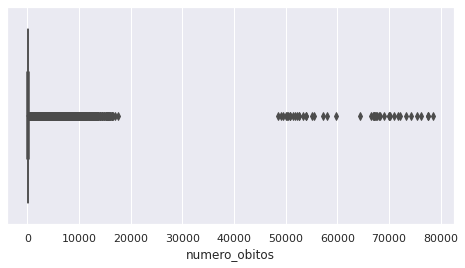

In [29]:
# Plot do Boxplot
box = sns.boxplot(df_mun['numero_obitos']);
box.figure.set_size_inches(8, 4)

In [30]:
# Analisar correlação 

# Aplicação do método de correlação de Person = o valor de 0 indica que não há associação entre as duas variáveis.
# Um valor maior que 0 indica uma associação positiva
df_mun.corr()

,ano,numero_obitos
ano,1.000000,0.017774
numero_obitos,0.017774,1.000000


<AxesSubplot:>

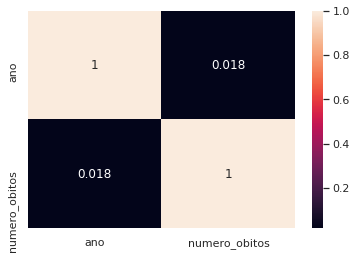

In [31]:
sns.heatmap(df_mun.corr(), annot=True)

In [32]:
# Aplicação do método de correlação de Spearman - segue uma lógica monotética

df_mun.corr('spearman')

,ano,numero_obitos
ano,1.000000,0.145514
numero_obitos,0.145514,1.000000


<AxesSubplot:>

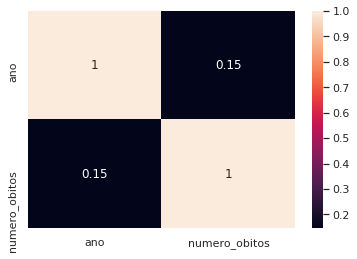

In [33]:
sns.heatmap( df_mun.corr( 'spearman' ), annot=True )

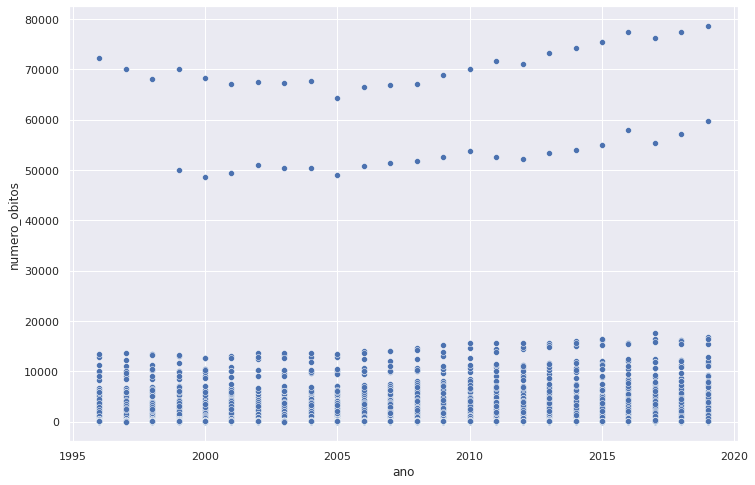

In [34]:
# Correlação de números de obitos por ano
scatt = sns.scatterplot( data=df_mun, x='ano', y='numero_obitos')
scatt.figure.set_size_inches(12, 8)
# Observer que a variação é muito pequena em relação ao método de Peson 

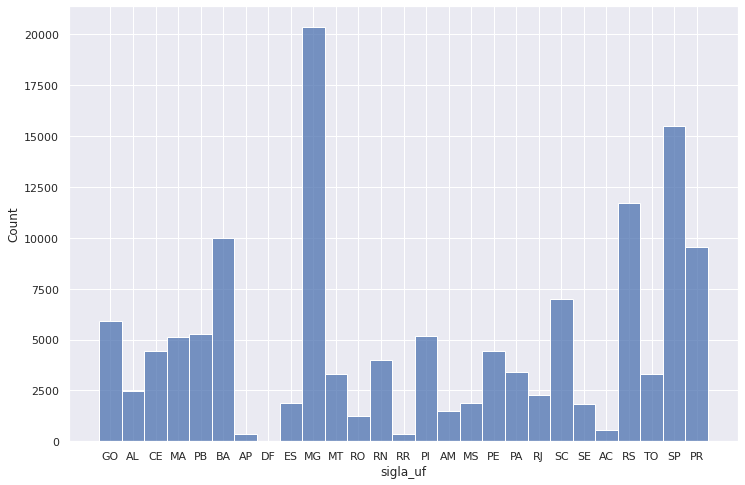

In [35]:
# Histograma de número de obitos por estado

grafico = sns.histplot( data=df_mun, x='sigla_uf')
grafico.figure.set_size_inches(12, 8)

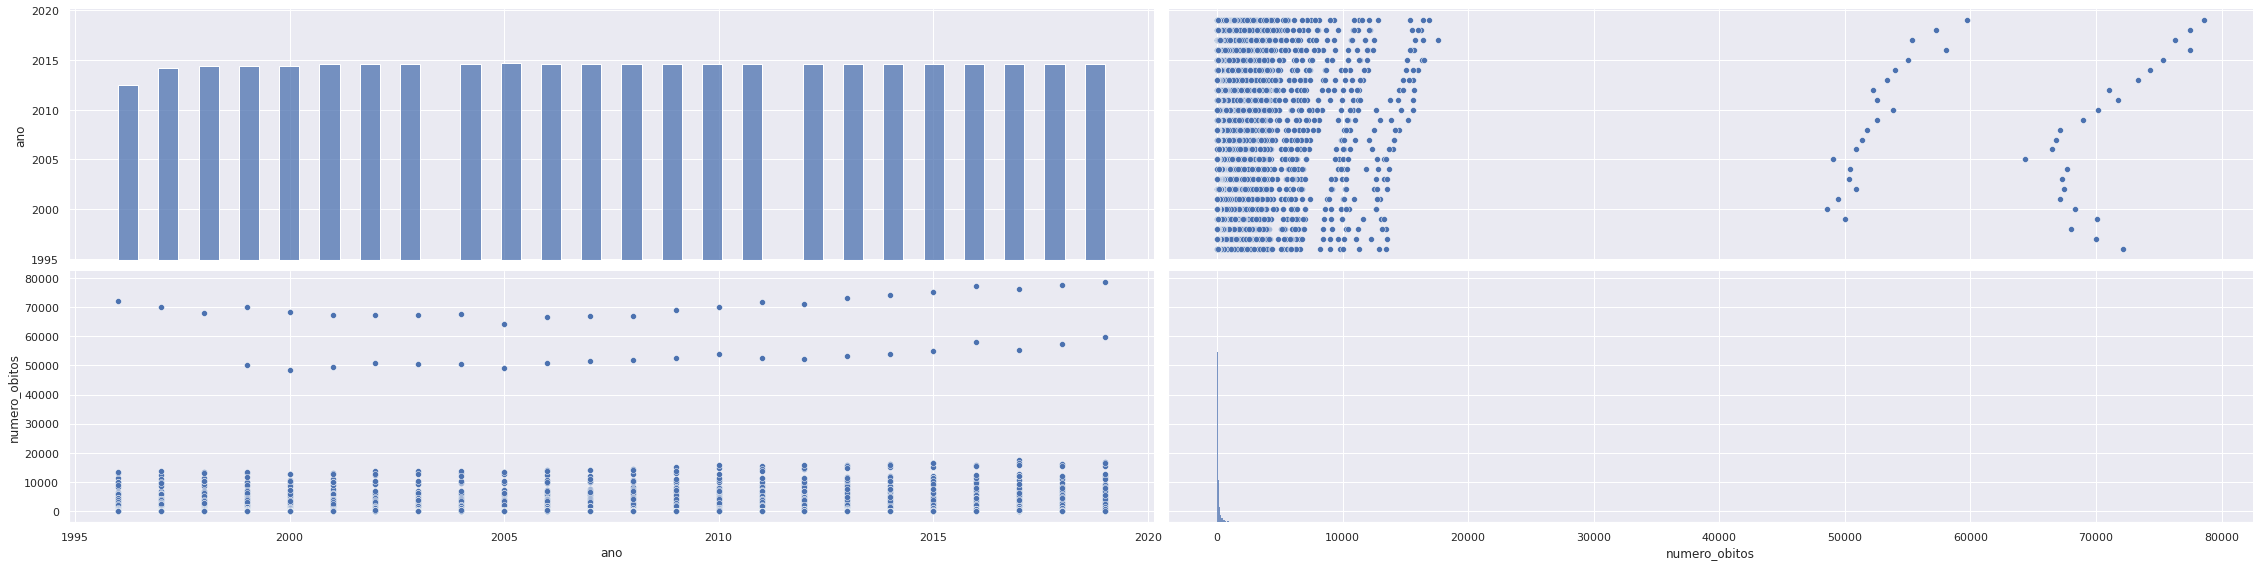

In [85]:
sns.pairplot(df_mun, height = 4, aspect = 4);